# Cars' MPG prediction using Linear regression

Welcome to this ipython notebook created for exploration and analysis of the Auto- MPG data-set from UCI Machine Learning Library. The data-set can be accessed separately from the UCI Machine Learning Repository along with many other interesting data-sets. Check http://archive.ics.uci.edu/ml/index.php for more.

This notebook aims primarily to demonstrate the use of pandas and seaborn for exploration and visualization of the dataset along with the use of scikit learn library to build regression models to predict the Miles Per Gallon(MPG) using the factors provided in the dataset

# So what is the auto-mpg data set?

The following description can be found on the UCI Repository page for the data-set  (http://archive.ics.uci.edu/ml/datasets/Auto+MPG)

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 8 attributes. There are total 393 number of instances.

Attribute Information:

a. mpg

b. cylinders

c. displacement

d. horsepower

e. weight

f. acceleration

g. model year

h. origin

i. car name

# Part 1. Import necessary modules

First we import the required library and import the data from files. Store the data into a dataframe and explore it.

In [1]:
# pandas package will help a lot to process and import/export data
import pandas as pd

# seaborn and matplotlib package that will be used to plot
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn is the library that contains regression model
# we use sklearn to build our linear regression model to predict the MPG
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

We have imported all the packages and libraries we will be using for the initial exploration of data. This notebook will be split into two major sections, majorly:

1. Exploration and Visualization using pandas and seaborn packages

2. Building and evaluating the linear regression models using scikit learn package

# Part 2. Import the data

In order to begin this exciting journey into the unchartered lands of the auto-mpg data set, we first need to know the location of this unexplored land. For our dataset, this location is 'auto-mpg.csv'. So let's tell python to take us to this place. Since we are the first explorers here, we will call this place data..because we like data..

In [2]:
# import data from the "auto-mpg.csv" file and set car name column as the index
data = pd.read_csv('auto-mpg.csv', index_col = 'car name')

# check out the first 10 rows of the dataset
data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
pontiac grand prix,16.0,8,400.0,230,4278,9.5,73,1
pontiac catalina,14.0,8,455.0,225,4425,10.0,70,1
buick estate wagon (sw),14.0,8,455.0,225,3086,10.0,70,1
buick electra 225 custom,12.0,8,455.0,225,4951,11.0,73,1
chevrolet impala,14.0,8,454.0,220,4354,9.0,70,1
plymouth fury iii,14.0,8,440.0,215,4312,8.5,70,1
ford f250,10.0,8,360.0,215,4615,14.0,70,1
chrysler new yorker brougham,13.0,8,440.0,215,4735,11.0,73,1
dodge d200,11.0,8,318.0,210,4382,13.5,70,1


# Part 3. Visualization using seaborn packages

After imported the data. Let's do a couple of visualization to check out some insight from the data.

# Let's look at mpg

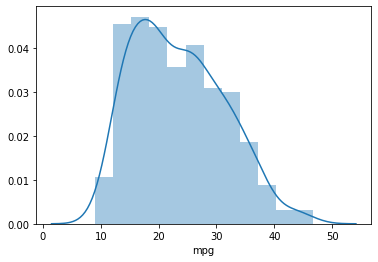

In [3]:
# plot a distribution plot of mpg
sns.distplot(data['mpg'])

From the plot, we can see the range of mpg is between roughly 8 to 45

# Next we look at model year and origin

Next, we take a look at which year has the highest number of the car models.

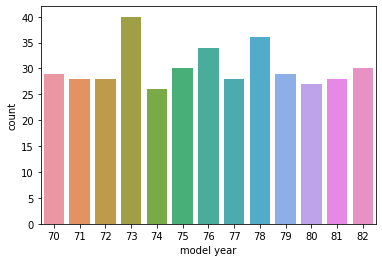

In [4]:
# count the number of car models of every year
sns.countplot(data['model year'])

From the plot, we can see the maximum number of car model are from the year 1973 and the minumum number of car model is from the year 1974.

Then, we take a look at which origin has the highest number of car model.

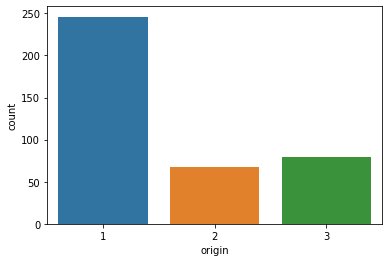

In [5]:
# count the number of car models of every origin
sns.countplot(data['origin'])

From the plot, we can see most of the car are from origin 1.

Here we will show some statistics about the data which include the histogram of each feature and the correlation between each pair of variables.

# Our journey so far:

So far, we have looked at our data using various pandas methods and visualized it using the seaborn package.

# Let's look at regression model:

Now that we know what our data looks like, let's use the machine learning model to predict the value of MPG given the values of the factors. We will use pythons scikit learn to train test regression models on our data and compare the results. We shall use the following regression models: Linear Regression

In [6]:
# check out the data set again
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
pontiac grand prix,16.0,8,400.0,230,4278,9.5,73,1
pontiac catalina,14.0,8,455.0,225,4425,10.0,70,1
buick estate wagon (sw),14.0,8,455.0,225,3086,10.0,70,1
buick electra 225 custom,12.0,8,455.0,225,4951,11.0,73,1
chevrolet impala,14.0,8,454.0,220,4354,9.0,70,1


# Part 4. Build the linear regression model

We identify X as our features to predict the mpg, y as the variable we want to predict. In this case, we are going to use the cylinders, displacement, horsepower, weight, acceleration, model year and origin columns to predict the mpg, so those columns are X, and mpg is y.

We split the whole data into the test and train set. We use 70% of the data to build the model and 30% of the data to test the accuracy of our model.

In [7]:
# identify our feature array X as the columns without mpg and our response variable y as the mpg columns
X = data.drop(columns= ['mpg']).values
y = data['mpg'].values

In [8]:
# split 70% of the dataset into training set, and  30% of the dataset into  testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
# initialize a linear regression model, and fit the linear model using training set, and create the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
# use our testsing set try to predict the MPG of the cars
y_pred = model.predict(X_test)

With three lines of code, we built the linear regression model called "model", and we made a prediction from the testing set.

# Part 5. Visualize the prediction

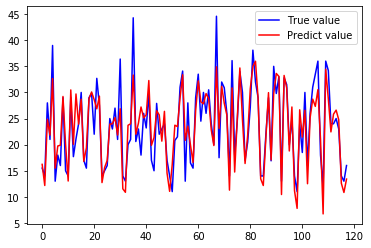

In [11]:
# plot the true value and predicted value of mpg on the drawing board figure
plt.plot(y_test, color='blue', label='True value')
plt.plot(y_pred, color='red', label='Predict value')

# mark a legend on the graph
plt.legend()

We can see from the plot that our model did a pretty good job of predicting the mpg of cars.

#  Top 5 highest mpg cars

In [12]:
# first sort our data by mpg from high to low
data = data.sort_values(by=['mpg'], ascending=False)
# check out our data again after sorted
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
mazda glc,46.6,4,86.0,65,2110,17.9,80,3
honda civic 1500 gl,44.6,4,91.0,67,1850,13.8,80,3
vw rabbit c (diesel),44.3,4,90.0,48,2085,21.7,80,2
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
vw dasher (diesel),43.4,4,90.0,48,2335,23.7,80,2


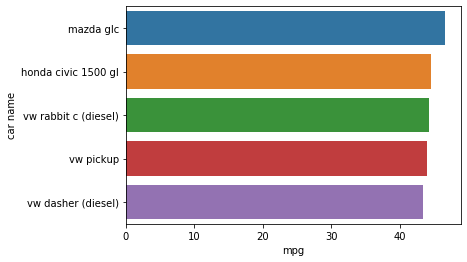

In [13]:
# polt a bar plot of our top 5 highest mpg cars
sns.barplot(data['mpg'][0:5],data.index[0:5])
# show plot
plt.show()

# Plot a pie chart

Which origin has the highest number of car model?

In [14]:
# count the number of model for different origins.
data.origin.value_counts()

1    246
3     79
2     68
Name: origin, dtype: int64

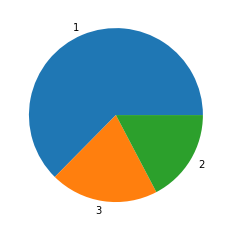

In [15]:
# set the labels and sizes for our pie chart
labels = '1', '3', '2'
sizes = [246, 79, 68]

# plot the pie chart of the origins
plt.pie(sizes, labels=labels)
#show plot
plt.show()

# Plot a correlation matrix

Check the correlation relationship between every attribute.

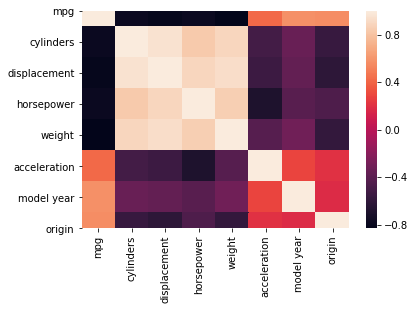

In [16]:
#plot a correlation matrix 
corrmat = data.corr()
sns.heatmap(corrmat)
#show plot
plt.show()

# Plot a histogram and a scatter plot

Show the correlation relationship between every attributes by scatter plots and distribution of every attributes by historgam.

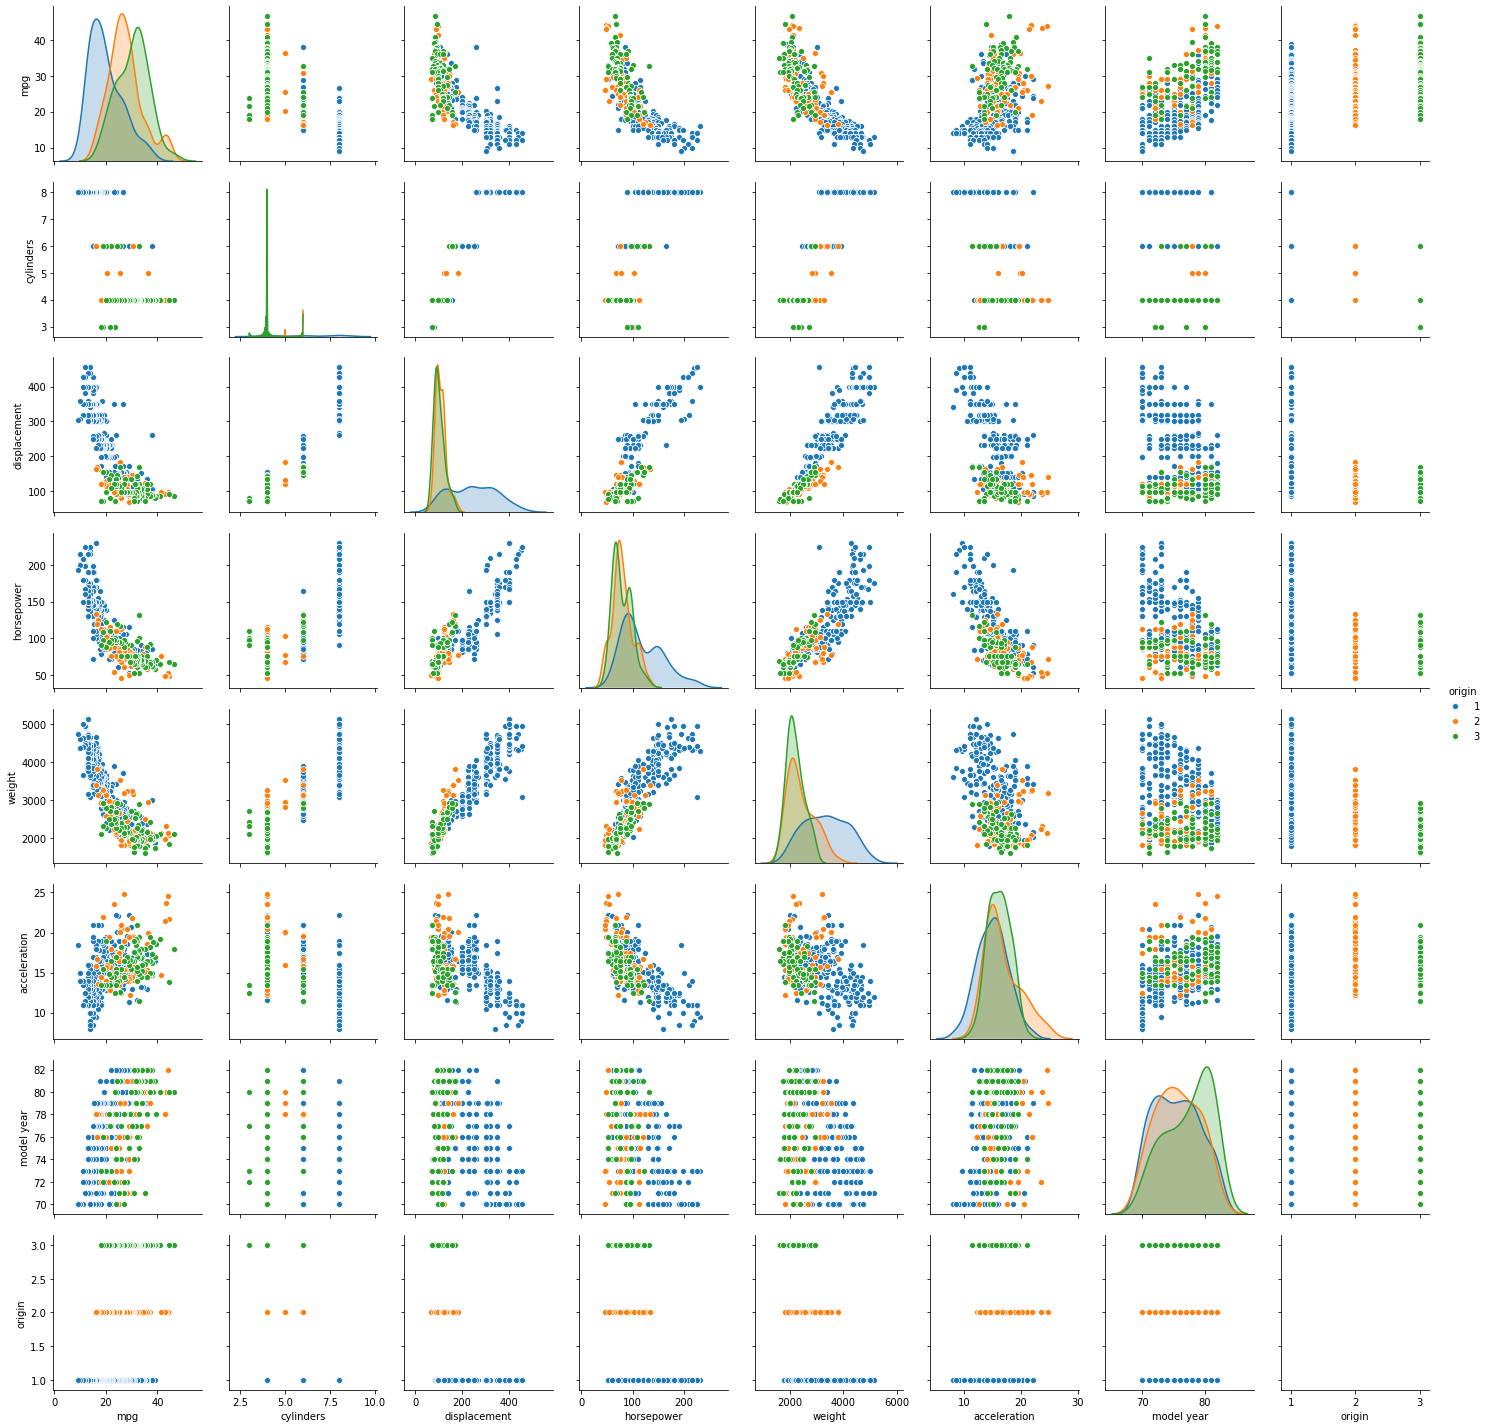

In [19]:
# plot the histogram as well as the scatter plot
sns.pairplot(data, hue = 'origin')
#show plot
plt.show()

# Plot a radar chart

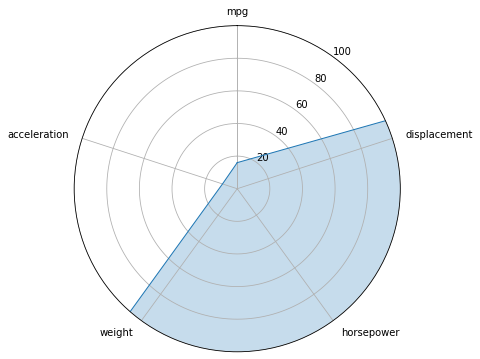

In [18]:
import numpy as np

# each attribute we'll plot in the radar chart.
labels = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

# let's look at the 1970 Chevy Impala and plot it.
values = [16,400,230,4278,9.5]

# number of variables we're plotting.
num_vars = len(labels)

# split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
values += values[:1]
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# draw the outline of our data.
ax.plot(angles, values, linewidth=1)
# fill it in.
ax.fill(angles, values, alpha=0.25)

# fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# ensure radar goes from 0 to 100.
ax.set_ylim(0, 100)
# you can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)